# Exercise 1
How would you define clustering? Can you name a few clustering algorithms?

Clustering is grouping similar instances together. Examples: 
- KMeans
- DBSCAN
- Gaussian Mixture Models

# Exercise 2
What are some of the main applications of clustering algorithms?


- Propagating the labels
- Anomally detection
- Feature engineering
- Image segmention

# Exercise 3
Describe two techniques to select the right number of clusters when using
k-means.

Using the silhouette score or using the inertia metric.

# Exercise 4
What is label propagation? Why would you implement it, and how?

Label propagation is implemented by clustering the instances, labeling an instance form a given cluster and then propagating this labels for each cluster through the whole set. I would implement it if I had a lot of data that needs labeling. I would use find clusters, get the representative instances, model them manually and then propagate labell. I could also use a LabelPropagation class.

# Exercise 5
Can you name two clustering algorithms that can scale to large datasets? And two
that look for regions of high density?


Scales well:
- Gausian Mixture with covariance type "spherical" or "diag"
-  kmeans
  
</br>Looking for high density regions:
- DBSCAN
- Gausian Mixture

# Exercise 6
Can you think of a use case where active learning would be useful? How would
you implement it?

Active learning would be useful when there's plenty of unlabeled data and you don't want to label all of it. The alghorithm can choose the data that is most needed to label.

# Exercise 7
What is the difference between anomaly detection and novelty detection?

In clustering or classification, novelty refers to new data that doesn't fit into any existing cluster or class. Anomaly, on the other hand, refers to instances that deviate significantly from what is considered "normal" or expected within a specific category.

# Exercise 8
What is a Gaussian mixture? What tasks can you use it for?

A Gaussian Mixture Model is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.

# Exercise 9
Can you name two techniques to find the right number of clusters when using a
Gaussian mixture model?


You can use AIC or BIC.

# Exercise 10
The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of
faces. Each image is flattened to a 1D vector of size 4,096. Forty different people
were photographed (10 times each), and the usual task is to train a model that
can predict which person is represented in each picture. Load the dataset using
the sklearn.datasets.fetch_olivetti_faces() function, then split it into a
training set, a validation set, and a test set (note that the dataset is already scaled
between 0 and 1). Since the dataset is quite small, you will probably want to
use stratified sampling to ensure that there are the same number of images per
person in each set. Next, cluster the images using k-means, and ensure that you
have a good number of clusters (using one of the techniques discussed in this
chapter). Visualize the clusters: do you see similar faces in each cluster?

In [4]:
from sklearn.datasets import fetch_olivetti_faces

X, y = fetch_olivetti_faces(return_X_y=True)

In [7]:
X.shape, y.shape

((400, 4096), (400,))

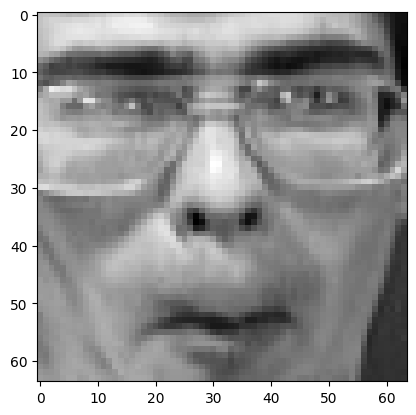

In [68]:
from matplotlib import pyplot as plt

plt.imshow(X[199].reshape(64,64), cmap="gray")
plt.show()

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_v_t, y_train, y_v_t = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_v_t, y_v_t, test_size=0.35, random_state=42, stratify=y_v_t)

len(X_train), len(X_valid), len(X_test)

(280, 78, 42)

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(5, 150, 2)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

In [96]:
import numpy as np

max_silhouette_score_idx = np.argmax(silhouette_scores)
k_values[max_silhouette_score_idx]

101

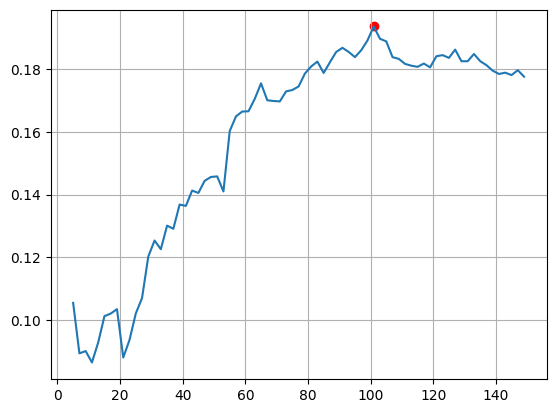

In [97]:
plt.plot(k_values, silhouette_scores)
plt.grid()
plt.scatter(k_values[max_silhouette_score_idx], silhouette_scores[max_silhouette_score_idx], c = "r")
plt.show()

In [98]:
kmeans = KMeans(n_clusters=k_values[max_silhouette_score_idx], random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=101, random_state=42)

Cluster 0


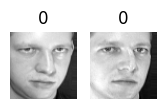

Cluster 1


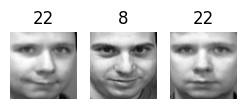

Cluster 2


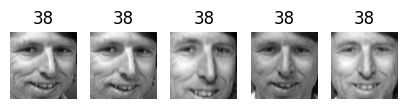

Cluster 3


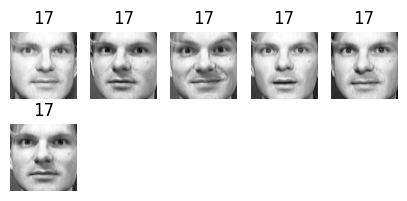

Cluster 4


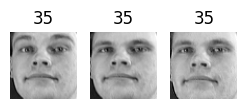

Cluster 5


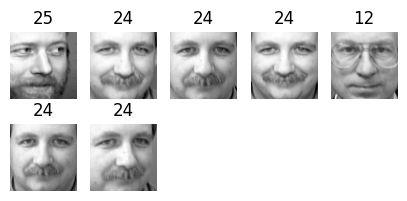

Cluster 6


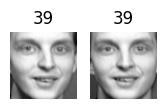

Cluster 7


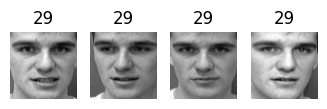

Cluster 8


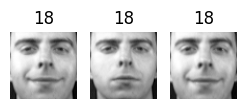

Cluster 9


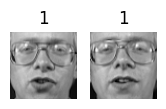

Cluster 10


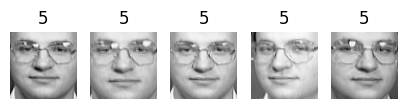

Cluster 11


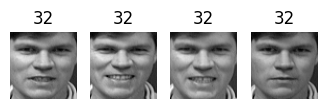

Cluster 12


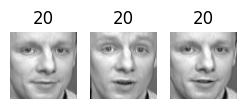

Cluster 13


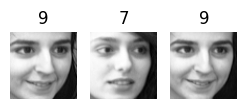

Cluster 14


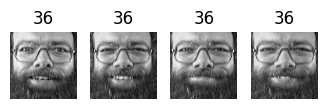

Cluster 15


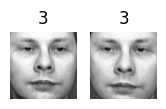

Cluster 16


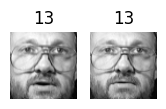

Cluster 17


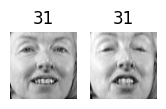

Cluster 18


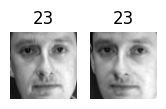

Cluster 19


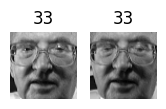

Cluster 20


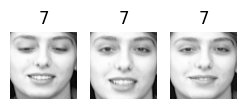

Cluster 21


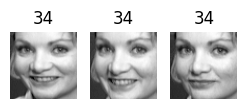

Cluster 22


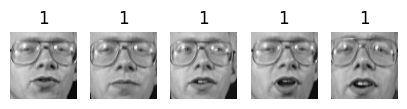

Cluster 23


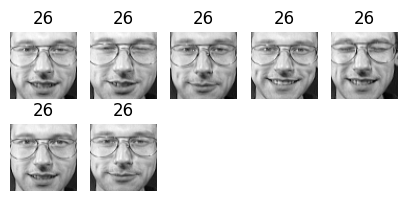

Cluster 24


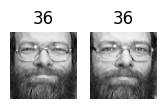

Cluster 25


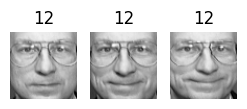

Cluster 26


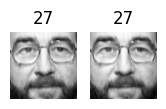

Cluster 27


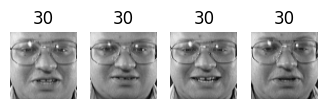

Cluster 28


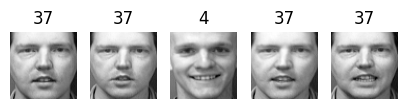

Cluster 29


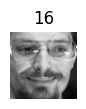

Cluster 30


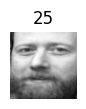

Cluster 31


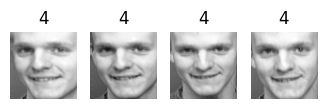

Cluster 32


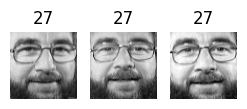

Cluster 33


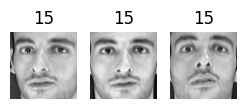

Cluster 34


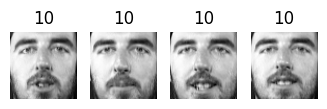

Cluster 35


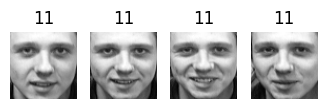

Cluster 36


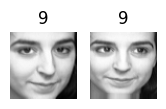

Cluster 37


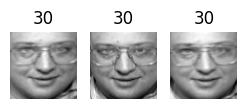

Cluster 38


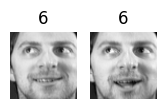

Cluster 39


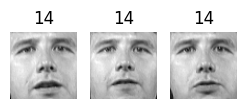

Cluster 40


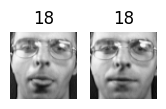

Cluster 41


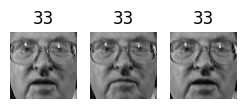

Cluster 42


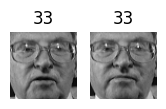

Cluster 43


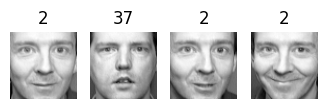

Cluster 44


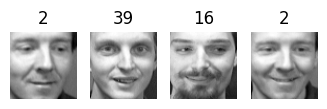

Cluster 45


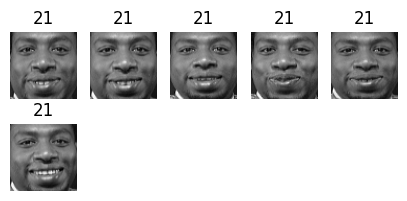

Cluster 46


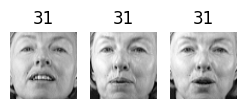

Cluster 47


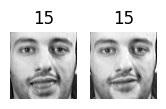

Cluster 48


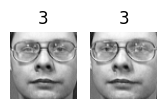

Cluster 49


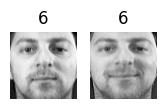

Cluster 50


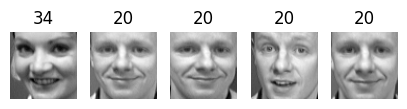

Cluster 51


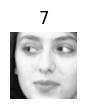

Cluster 52


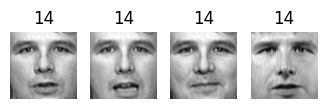

Cluster 53


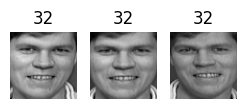

Cluster 54


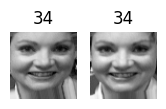

Cluster 55


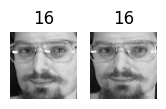

Cluster 56


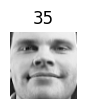

Cluster 57


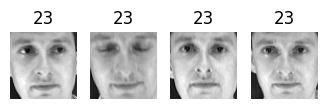

Cluster 58


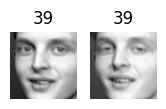

Cluster 59


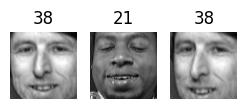

Cluster 60


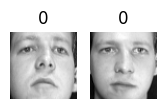

Cluster 61


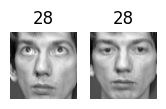

Cluster 62


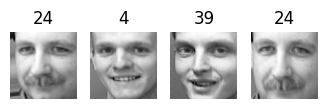

Cluster 63


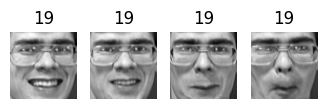

Cluster 64


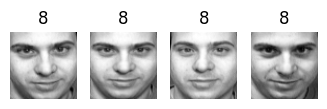

Cluster 65


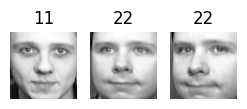

Cluster 66


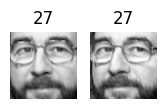

Cluster 67


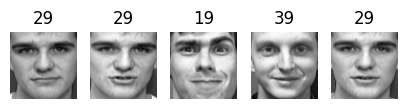

Cluster 68


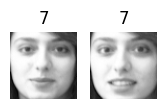

Cluster 69


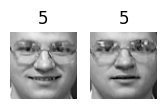

Cluster 70


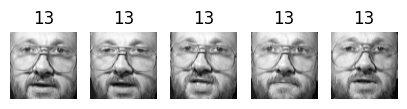

Cluster 71


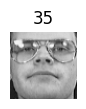

Cluster 72


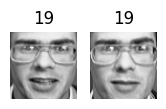

Cluster 73


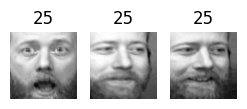

Cluster 74


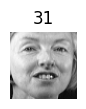

Cluster 75


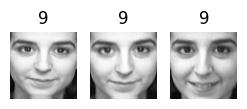

Cluster 76


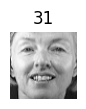

Cluster 77


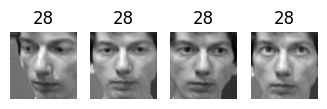

Cluster 78


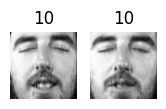

Cluster 79


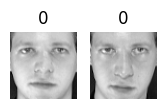

Cluster 80


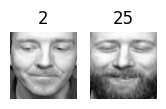

Cluster 81


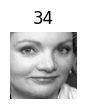

Cluster 82


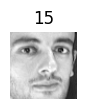

Cluster 83


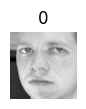

Cluster 84


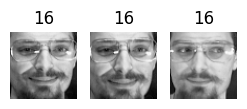

Cluster 85


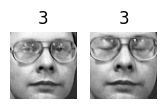

Cluster 86


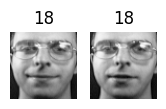

Cluster 87


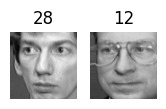

Cluster 88


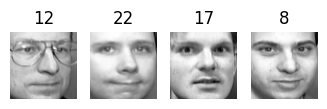

Cluster 89


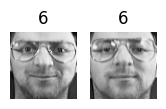

Cluster 90


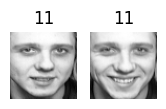

Cluster 91


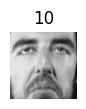

Cluster 92


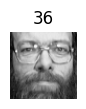

Cluster 93


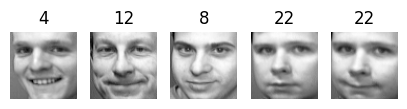

Cluster 94


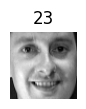

Cluster 95


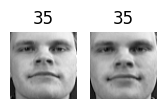

Cluster 96


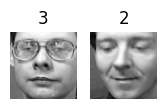

Cluster 97


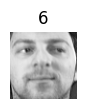

Cluster 98


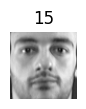

Cluster 99


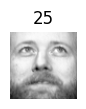

Cluster 100


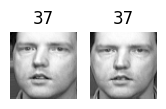

In [101]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(kmeans.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

# Exercise 11
Continuing with the Olivetti faces dataset, train a classifier to predict which
person is represented in each picture, and evaluate it on the validation set. Next,
use k-means as a dimensionality reduction tool, and train a classifier on the
reduced set. Search for the number of clusters that allows the classifier to get
the best performance: what performance can you reach? What if you append the
features from the reduced set to the original features (again, searching for the
best number of clusters)?


In [104]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [105]:
rf_clf.score(X_valid, y_valid)

0.9230769230769231

In [109]:
X_train_red = kmeans.transform(X_train)
X_train_red[0].shape

(101,)

In [110]:
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_clf.fit(X_train_red, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [113]:
X_valid_red = kmeans.transform(X_valid)

In [114]:
rf_clf.score(X_valid_red, y_valid)

0.9102564102564102

In [119]:
X_train_appended = np.concatenate([X_train, X_train_red], axis=1)
X_train_appended.shape

(280, 4197)

In [120]:
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_clf.fit(X_train_appended, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [121]:
X_valid_appended = np.concatenate([X_valid, X_valid_red], axis=1)

In [122]:
rf_clf.score(X_valid_appended, y_valid)

0.9358974358974359

# Exercise 12
Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the
algorithm, you should probably reduce the dataset’s dimensionality (e.g., use
PCA, preserving 99% of the variance). Use the model to generate some new
faces (using the sample() method), and visualize them (if you used PCA, you
will need to use its inverse_transform() method). Try to modify some images
(e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e.,
compare the output of the score_samples() method for normal images and for
anomalies).


# Ecercise 13
Some dimensionality reduction techniques can also be used for anomaly detec‐
tion. For example, take the Olivetti faces dataset and reduce it with PCA, preserv‐
ing 99% of the variance. Then compute the reconstruction error for each image.
Next, take some of the modified images you built in the previous exercise and
look at their reconstruction error: notice how much larger it is. If you plot a
reconstructed image, you will see why: it tries to reconstruct a normal face.